In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

dataset = pd.read_csv(r'C:\Users\rosti\Downloads\breast+cancer+wisconsin+original\breast-cancer-wisconsin.data')
dataset.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
clean_dataset = dataset.dropna()

for x in clean_dataset.index:
    if clean_dataset.loc[x, 'Bare Nuclei']=='?':
        clean_dataset.drop(x, inplace = True)

clean_dataset = clean_dataset.astype({'Bare Nuclei':'int64', 'Sample code number':'category'})

clean_dataset = clean_dataset.drop(['Sample code number'], axis = 1)

X = clean_dataset.drop(['Class'], axis = 1)
y = clean_dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler()#стандартизація даних

scaler.fit(X_train)#тренування
scaled_X_train = scaler.transform(X_train)#створення DataFrame
scaled_X_test = scaler.transform(X_test) 

knn = KNeighborsClassifier(n_neighbors=5)# kNN класифікатор
knn.fit(scaled_X_train, y_train)

pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))

[[95  4]
 [ 4 34]]


In [11]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           2       0.96      0.96      0.96        99
           4       0.89      0.89      0.89        38

    accuracy                           0.94       137
   macro avg       0.93      0.93      0.93       137
weighted avg       0.94      0.94      0.94       137



In [12]:
print(accuracy_score(y_test, pred))#точність

0.9416058394160584


In [13]:
error_rate = []

for i in range(1,30):#пошук оптимальних параметрів для алгоритму
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

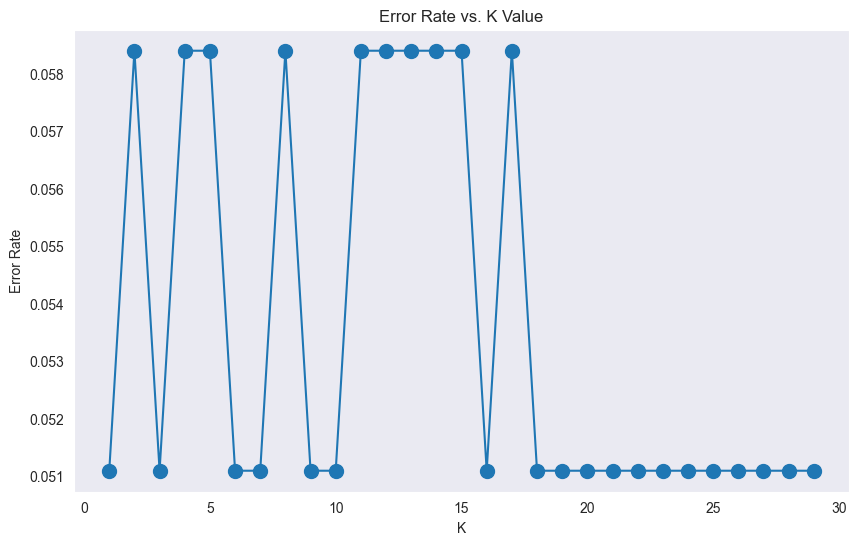

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()#перевірка результатів

In [19]:
knn = KNeighborsClassifier(n_neighbors=6)#вибір найкращого з вибірки параметра

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))

[[96  3]
 [ 4 34]]


In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           2       0.96      0.97      0.96        99
           4       0.92      0.89      0.91        38

    accuracy                           0.95       137
   macro avg       0.94      0.93      0.94       137
weighted avg       0.95      0.95      0.95       137

